# Julia Petrie

## Research question/interests

I am interested in understanding how the change in modern-day technology has affected high school graduation rates. Additionally, I am interested in the data surrounding cohorts as throughout my high school career I heard the term frequently but never fully understood the meaning or reason behind it. I am intrigued by the effect the curriculum can have on graduation rates.

In [10]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
df.shape
df.head()
df.columns

#index of all column titles

Index(['Unnamed: 0', 'YEAR_6_OF_COHORT', 'DATA_LEVEL', 'SUB_POPULATION',
       'PUBLIC_OR_INDEPENDENT', 'DISTRICT_NUMBER', 'DISTRICT_NAME',
       'FACILITY_TYPE', 'COMPLETION_RATE_MODEL', 'MODEL_TYPE', 'COHORT_COUNT',
       'SUCCESS_COUNT', 'ESTIMATED_OUTMIGRANTS', 'ESTIMATED_COMPLETION_RATE'],
      dtype='object')

In [6]:
df = pd.read_csv("../data/processed/Completion_Rates_Clean.csv")
df

,Unnamed: 0,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821,55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185,35.196,100.000
49822,55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20,3.312,96.677
49823,55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165,31.884,100.000
49824,55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41,6.970,100.000


In [12]:
df_cleaned = df[df[ 'SUB_POPULATION'].str.contains( 'ALL STUDENTS' )== True]
df_cleaned = df[df[ 'DATA_LEVEL'].str.contains( 'DISTRICT LEVEL' )== True]
df_cleaned = df[df[ 'MODEL_TYPE'].str.contains( 'DYNAMIC MODEL' )== True]
#df_cleaned = df[df[ 'ESTIMATED_OUTMIGRANTS']]
df = df.dropna(axis=0)
df_cleaned.shape
df

df_cleaned

          


#year of cohort // sub_population // completion rate model // model type // cohort_count // estimated_completion_rate

,Unnamed: 0,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
11,15,1997/1998,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,670,465,84.519,79.422
12,20,1997/1998,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,6.0,Rocky Mountain,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,369,239,51.679,75.318
13,25,1997/1998,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,8.0,Kootenay Lake,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,546,382,49.935,77.006
14,26,1997/1998,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,8.0,Kootenay Lake,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,27,10,3.664,42.852
15,27,1997/1998,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,8.0,Kootenay Lake,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,519,372,46.271,78.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48075,53707,2019/2020,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,209,186,270.005,-304.892
48076,53708,2019/2020,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,16,15,23.611,-197.087
48077,53709,2019/2020,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,193,171,246.394,-320.258
48078,53710,2019/2020,DISTRICT LEVEL,SPECIAL NEEDS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,40,35,53.960,-250.715


In [21]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [11]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Unnamed: 0,DISTRICT_NUMBER,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
count,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000
mean,28526.645340,52.186776,538.193680,449.064638,42.905085,81.535154
std,15704.960582,22.248752,815.949745,708.629091,112.794982,41.733133
min,15.000000,5.000000,10.000000,10.000000,0.000000,-3690.646000
25%,15048.000000,37.000000,97.000000,65.000000,5.711000,74.822000
50%,28625.000000,52.000000,244.000000,191.000000,15.251000,89.212000
75%,42075.000000,70.000000,603.000000,497.000000,43.711000,98.404000
max,55595.000000,93.000000,6276.000000,5937.000000,7477.374000,100.000000


<AxesSubplot:>

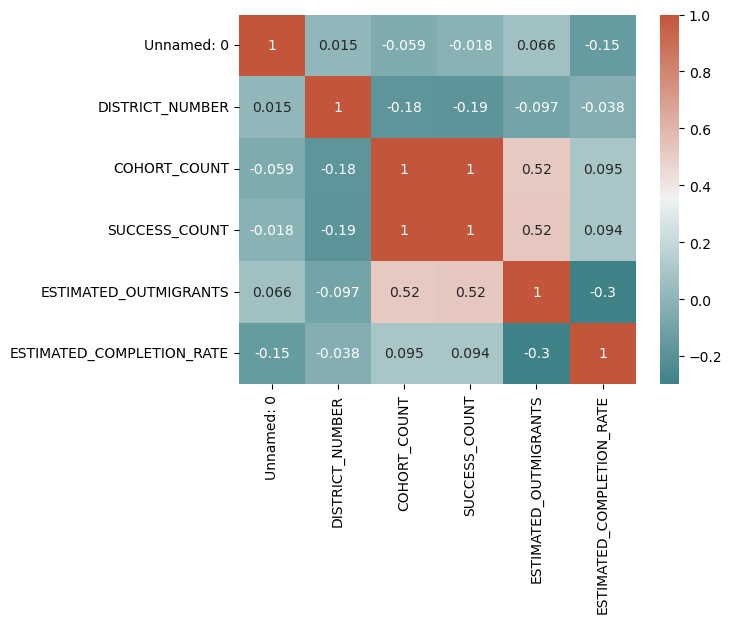

In [23]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

<AxesSubplot:ylabel='Frequency'>

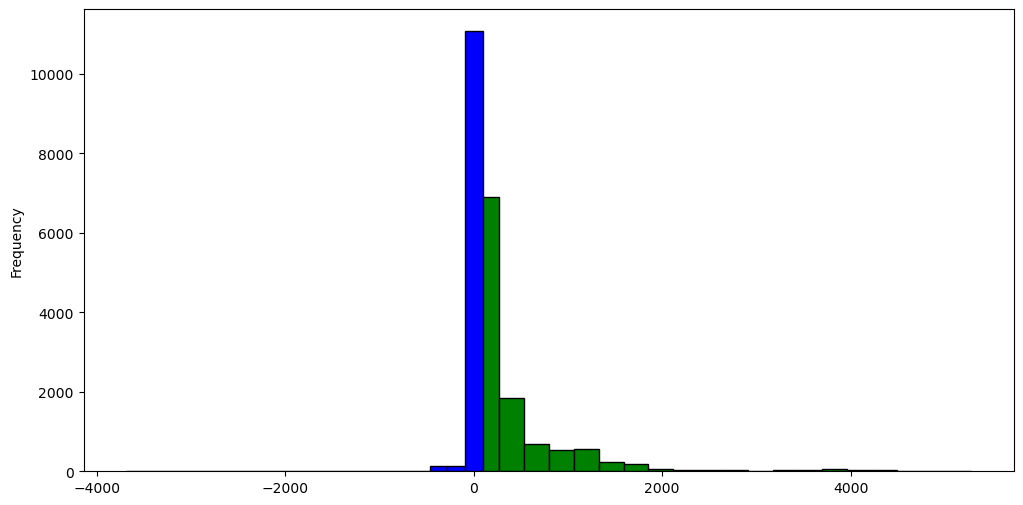

In [28]:
df_cleaned['SUCCESS_COUNT'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='green',edgecolor='black')
df_cleaned['ESTIMATED_COMPLETION_RATE'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='blue',edgecolor='black')

<AxesSubplot:xlabel='SUCCESS_COUNT', ylabel='ESTIMATED_COMPLETION_RATE'>

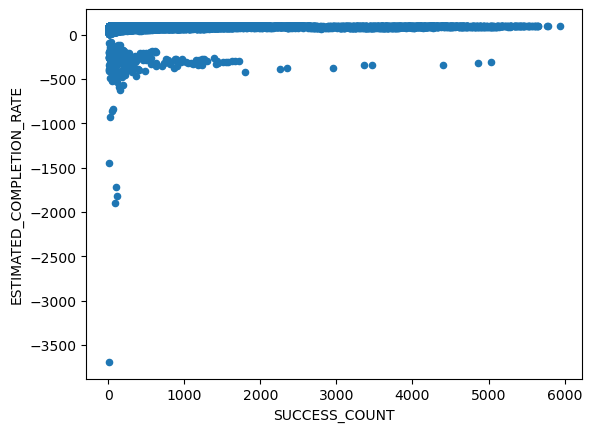

In [31]:
df_cleaned.plot(kind='scatter', x='SUCCESS_COUNT', y='ESTIMATED_COMPLETION_RATE')


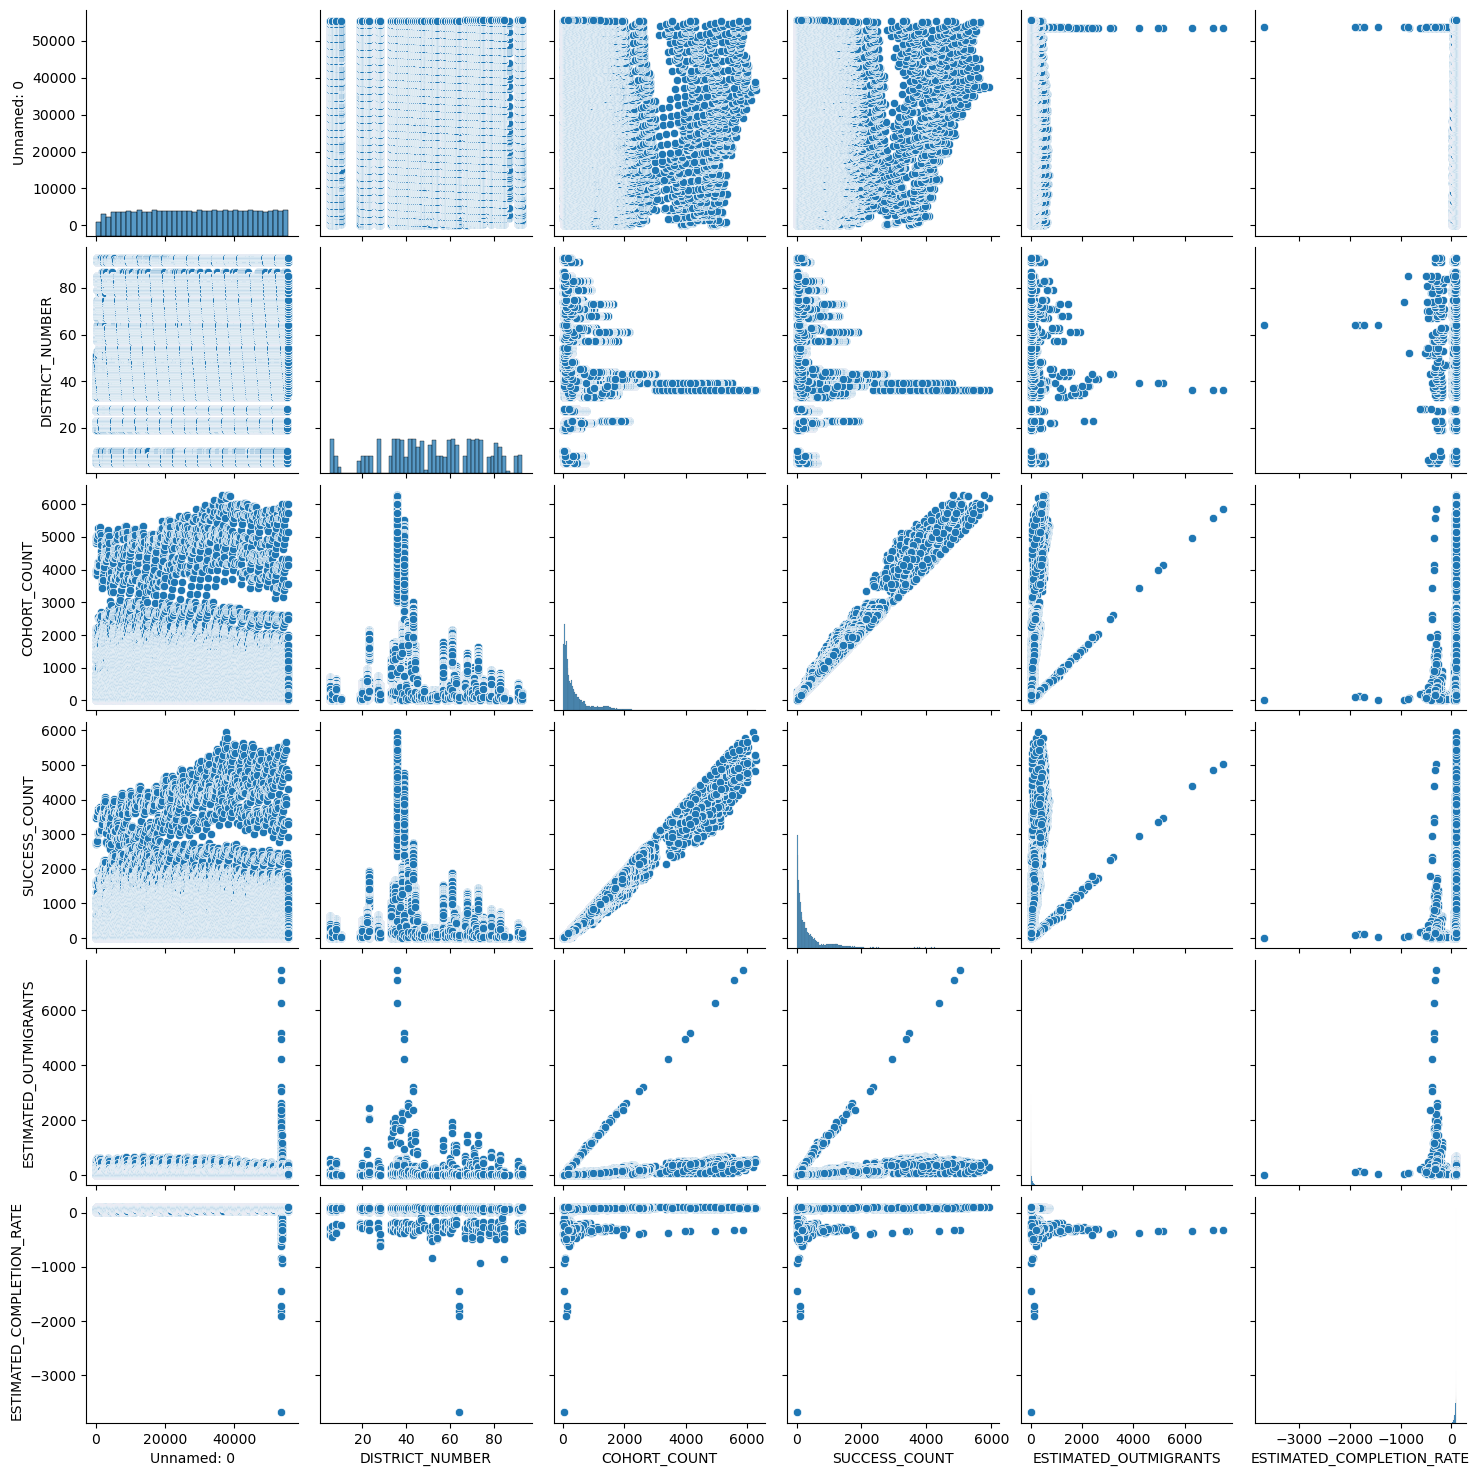

In [20]:
#pair plots
g = sns.pairplot(df)
